# **1. Problem Statement**

Marketing is crucial for any business.
It can help develop the company's brand , increase revenue and sales and expand the base of customers.

Certain Objectives for Marketers are:


*   Indentifying Customer Needs and launch targetted marketting campaign for those specific needs.

## **1.1 Objective**

Provided the Customer data , perform Market Segmentation for the Customers into atleast 3 distinctive groups so the marketing team can launch a targeted campaign for the respective groups.

Since the task is of grouping Customers, it is understood that we have to perform an unsupervised learning task of Clustering the Customers into a minimum of 3 groups having commom characteristics.


## **1.2 Pre Requisite**

We have the dataset of a bank with their customer data from the past 6 months.

# **2. Importing Dataset and Libraries**

In [ ]:
# Importing the relevant Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Importing the dataset

creditcard_df = pd.read_csv("/Dataset/Marketing_data.csv")

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user


In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## **2.1 Initial Observation**




In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### **2.1.1 Observations:**
1. The Mean Balance is aroung 1500$
2. The Customers get ther balance frequently updates as its very close to 1
3. The average purchases are for 1000 Dollars
4. Around 15% pay the amount in full.
5. An Inidividual has a one off purchase for 40761
6. Another customer had taken a cash advance of 47137

lets understand these 2 extremes , as both instances are not very frequently occuring



In [ ]:
# Checking the user that made a one off purchase of over 40,000$
# Customer 1
creditcard_df[creditcard_df['ONEOFF_PURCHASES']> 40761]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Checking user that took a cash advance of over 47000
# Customer 2
creditcard_df[creditcard_df['CASH_ADVANCE']> 47137]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### 2.1.2 Further Insight

**Customer 1:**
* Is a very frequent purchaser
* most of his transactions are made by single direct payments
* He hasnt used the cash advancement feature, maybe he can be targeted with offers and promotions 
* for cash advancement.
* He makes the FUll mayment 25% of the times which is way higher than the average mean.

**Customer 2:**
* This cutomer below made 123 Cash advances, the below customer is quite different to each
* other considering the cash advance feature.
* also, the below customer has never made a full payment.

# **Checkopint 1**
Creating a copy of the DataFrame

In [ ]:
creditcard_df_1 = creditcard_df.copy()

# **3. Data Visualization and Exploation**

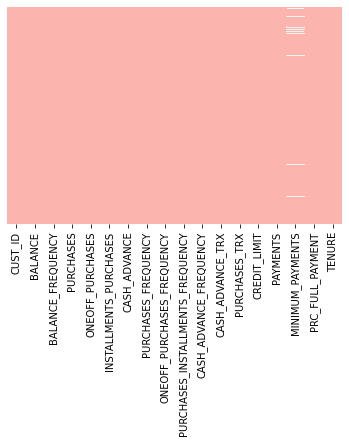

In [ ]:
# Checking For Missing Data Using a HeatMap

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar=False, cmap = 'Pastel1')
plt.show()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 3.1 Imputing Missing Data

We have one missing value in the credit_limit columns and around 131 missing vlaues in minimum payments.
Replacing the missing values with the mean value for their columns.

In [ ]:
# Setting the value of MINIMUM_PAYMENTS to Mean, if minimum payments is null
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Setting the value of CREDIT_LIMIT to Mean, if Credit limit is null
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

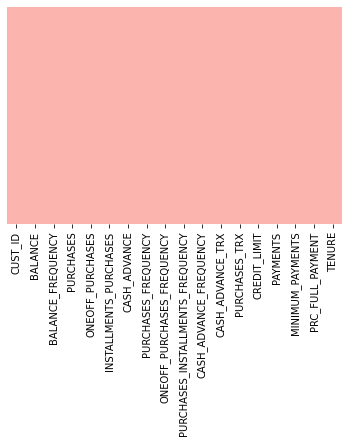

In [ ]:
# Re - Checking For Missing Data Using a HeatMap

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar=False, cmap = 'Pastel1')
plt.show()

## 3.2 Checking for Duplicated Rows

In [ ]:
creditcard_df.duplicated().sum()

0

## 3.3 Dropping Customer ID
Dropping the column Customer ID as it will not add any value in building the Clusters.

In [ ]:
creditcard_df.drop(columns='CUST_ID', axis=1,inplace=True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3.4 Dist plots

KDE Plots are a combination of Histograms along with Kernel Density plots.

**Observations**:

* The Number of purchases graph is right skewed, majority of the transactions are around 1000, we do have certain customers that make large amount purchases but the number is low for those.

* Majoprity Customers have an average balance of around 1500 in their account.

* Balance is updated frequently, most customers are frequesnt users of card.

* We can see Two groups of customers based on purchases frequency, some people are frequent purchasers while others dont use thier credit card that frequently. iyt might be a factor in developing the Clusters.

* Not a lot of customers  do one off purchase and use the cash advance feature, it could be due to penalty for not being able to pay on time.

* Majority Customers do not pay full amount , only a small subset of the customer base does.

* Most customers have been using the card for around 12 years.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

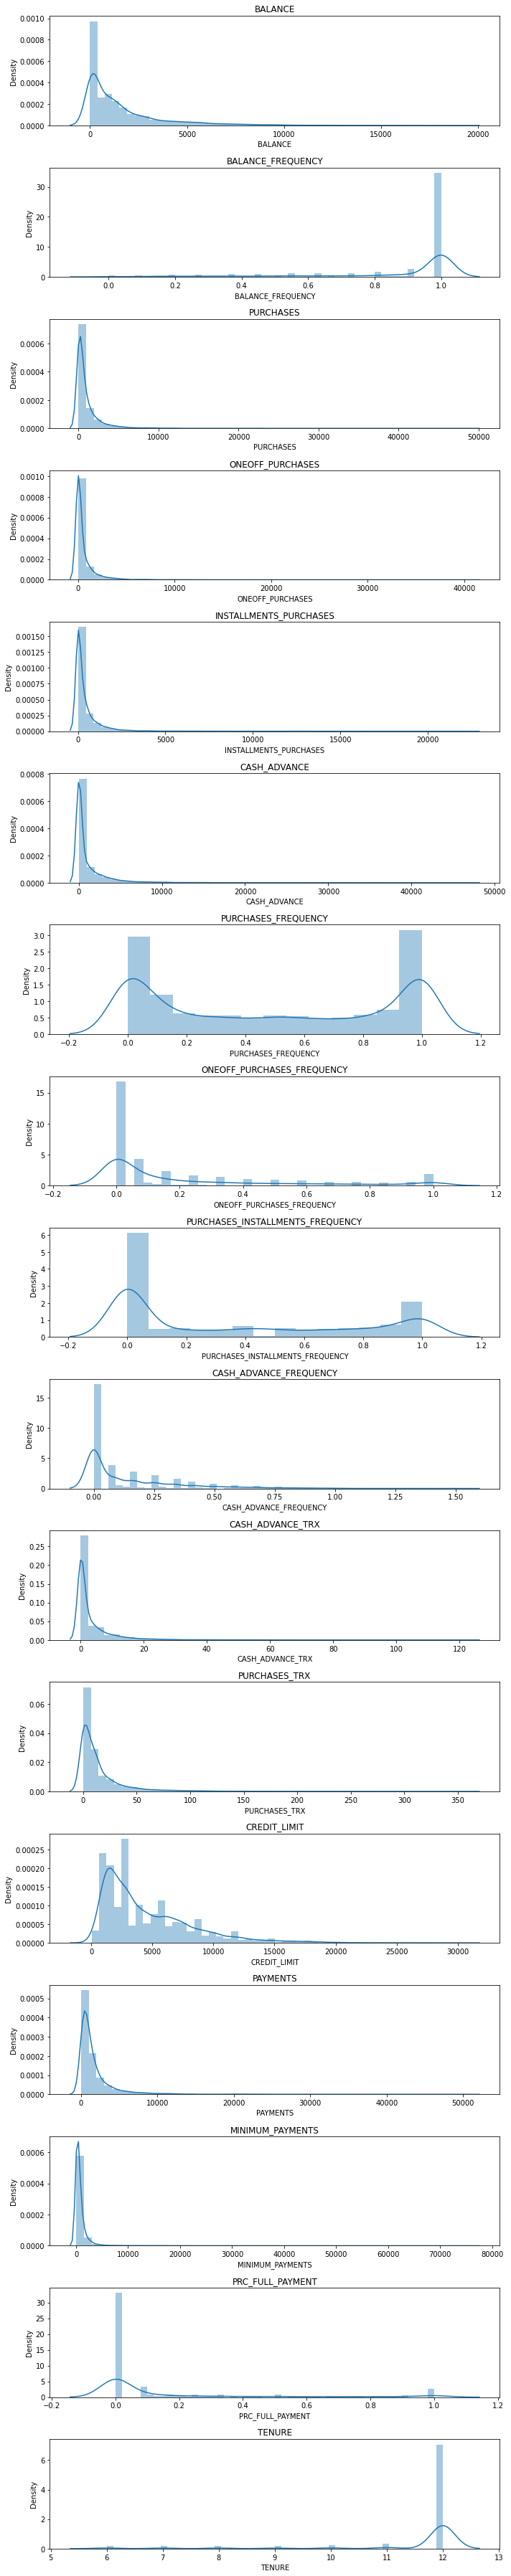

In [ ]:
plt.figure(figsize=(10,50))

for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]])
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

## 3.5 Co-Relations Matrix

**Observations:**




***Positive Co-relations:***
* **Purchases** are heavily positively co-related with **one off purchases** and 
i**nstallment purchases**,which does make sense since both factor into the total number of purchases.

* Purchases is also related positively with **credit limit** and **payments**, the purchases made leads to bank having more confidence in the customer repaying. Therefore, they increase the credit limit which allows customers to make more purchases.

***Negative Co-relations:***

* **Full Payment** and **Balance** are negatively co related, which would make sense as someone not making a full payment would be having lesser balance as the credit limit would be locked.

* Also the **cash advance frequency** and **full payment** also posesses an negative co-relation maybe because if someone is able to pay the entire amount, that customer **might not need a cash advance** for their purchases.another reason could be they might be making **smaller transactions**.

* **Purchases Frequency** and **Purchases installment frequency**  are negatively corelated with **cash advance frequency**.

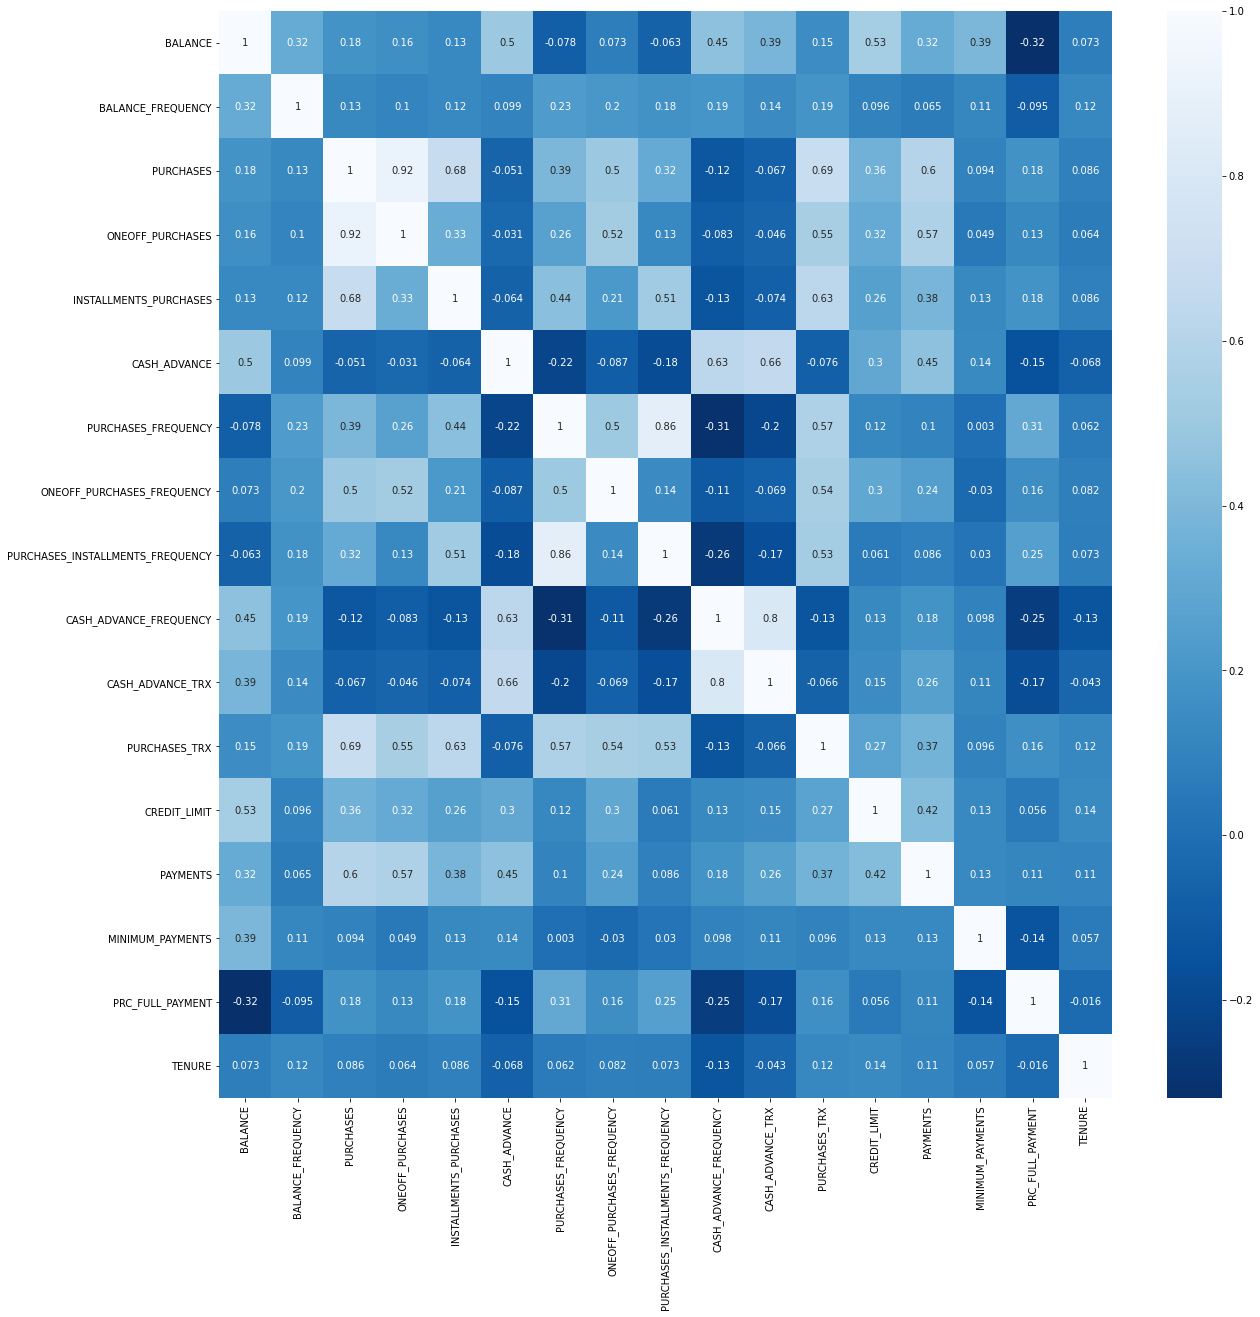

In [ ]:
# Plotting the Co-Relation Matrix

f, ax = plt.subplots(figsize=(20,20))
correlations = creditcard_df.corr()
sns.heatmap(correlations, annot = True, cmap='Blues_r')
plt.show()

### 3.5.1 Positively Corelated Features
Only viewing parameters having a corelation value greater than 0.6

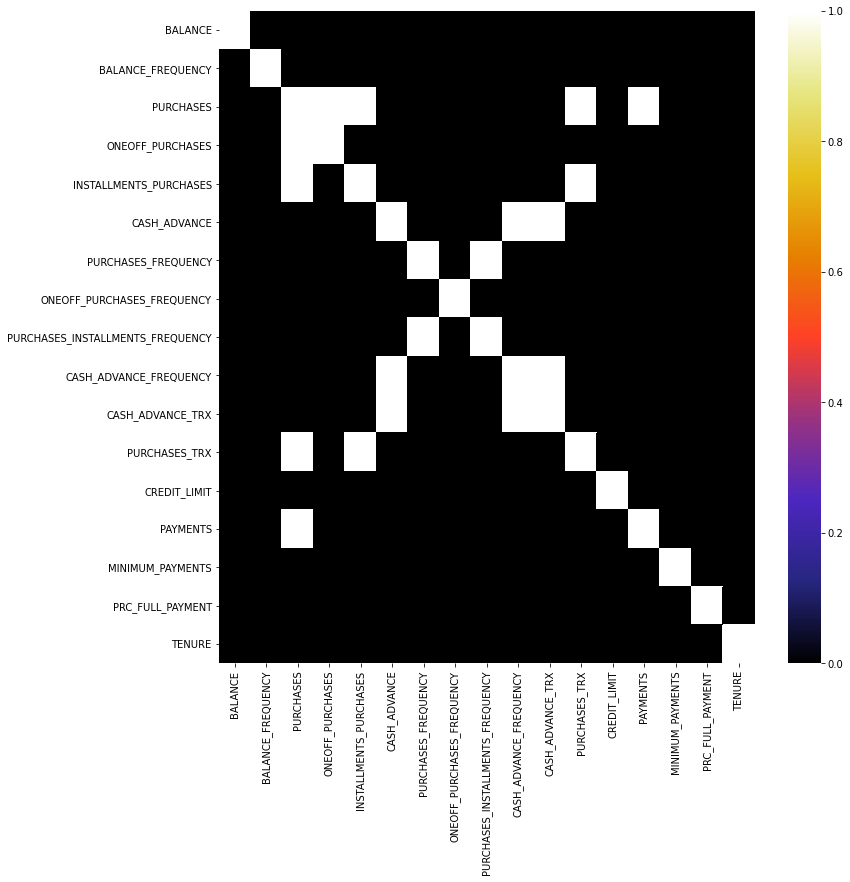

In [ ]:
# plotting co-relations greater tha 0.6

# Plotting the Co-Relation Matrix

f, ax = plt.subplots(figsize=(12,12))
correlations = creditcard_df.corr()>0.6
sns.heatmap(correlations, cmap='CMRmap')
plt.show()

### 3.5.2 Positively Corelated Features
Only viewing parameters having a corelation value lesser than -0.1

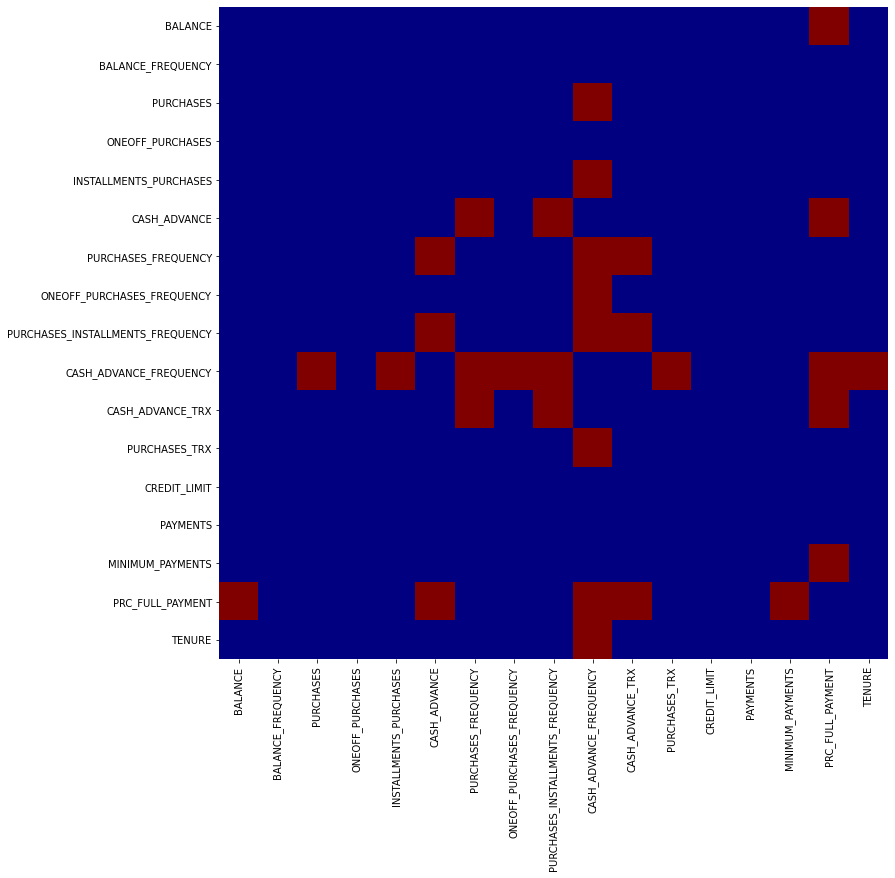

In [ ]:
# plotting co-relations lesser tha -0.1

# Plotting the Co-Relation Matrix

f, ax = plt.subplots(figsize=(12,12))
correlations = creditcard_df.corr()<-0.1
sns.heatmap(correlations, cmap='jet', cbar=False)
plt.show()

# **Checkpoint 2**

In [ ]:
creditcard_df_2 = creditcard_df.copy()

# **4. Understanding K Means for Clustering**



**k-means** aims to partition **n** observations into **k** clusters in which each observation belongs to the cluster with the nearest mean(centroid).

It aims to minimizes within cluster variances(squared equilidean distance).The algorithm uses an iterative approach.

***Algorithm***:




1.   Choose the number of **clusters k** to split the dataset in.

2.   Randomly assign the **centeroids** for the dataset.

3.   **Assignment step**:
assign each observation to the cluster with the nearest mean with least squared euclidean distance

4. **update step**:
recalculate mean centroid for observations assigned to each cluster/

5. repeat Step 3 and Step 4 until convergance is reached.


for more information:
https://en.wikipedia.org/wiki/K-means_clustering

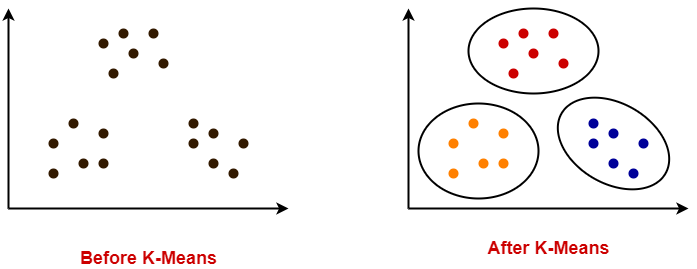

## **4.1 How to select a value for k?**

The Value of k can be selected by using the Elbow Curve.

Elbow curve is a plot used to determine the most **optimal number of cluster** in Cluster Analysis.

**What is Elbow Curve?**

Elbow Curve is a plot of **variation** against the **number of clusters**.

In our case , the variation is the **Within Cluster Squared Loss**.


## **4.2 Scaling Data**

We need to scale the data before feeding it into k-means cluster to ensure data with large values are not causing a bias.



In [ ]:
## Scaling Data 

scaler = StandardScaler()

creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape


(8950, 17)

## **4.3 Plotting the Elbow Curve**

From the Elbow Curve below, We can see that the **WCSS Scores doesnt significantly reduce** after the 9th clusters.
Therefore,between **7-9** Clusters should be able to split our current dataset fairly.

In [ ]:
# declaring a variable for storing the WCSS in an array

wxss_scores = []

num_of_clusters = range(1,21)

for i in num_of_clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wxss_scores.append(kmeans.inertia_)

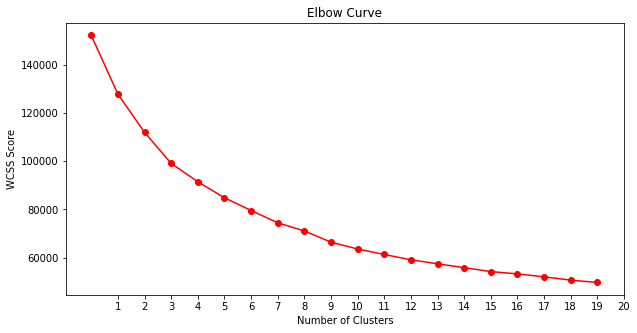

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(wxss_scores,'ro-')
plt.xticks(num_of_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Score")
plt.title("Elbow Curve")
plt.show()

# **Checkpoint 3**

In [ ]:
creditcard_df_3 = creditcard_df.copy()

# **5. Applying K Means**

Using 8 as the value of k to split the dataset in 8 Clusters.


In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
# This variable holds the cluster number for each customer of the dataset
print(f"\nLabels:\n{labels}")
print(f"\nCluster Center's Shape:\n{kmeans.cluster_centers_.shape}")


Labels:
[1 0 7 ... 6 1 3]

Cluster Center's Shape:
(8, 17)


In [ ]:
# centroid value for each feature on individual clusters

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

In [ ]:
# since the data is scaled, using inverse transform to get the original values.

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4832.764909,0.965060,512.800275,323.784704,189.123044,5088.453244,0.295888,0.140435,0.192116,0.519716,15.951374,7.730444,7974.687680,3887.797854,1664.869966,0.039512,11.377378
1,1532.414967,0.965027,230.086226,185.505356,44.734252,812.155385,0.142277,0.083202,0.059405,0.163259,3.088407,2.556588,3249.266139,960.290265,692.993373,0.020990,11.509804
2,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
3,111.149066,0.371056,324.098849,200.075425,124.252790,335.162289,0.263147,0.073014,0.181040,0.038223,0.789026,4.077280,3714.438867,1087.170107,269.095727,0.227469,11.297527
4,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
5,3667.921744,0.987242,6355.558571,3634.310196,2722.929048,652.629397,0.957143,0.675711,0.868161,0.079106,2.243697,92.067227,9187.955182,5936.935342,1705.894623,0.231511,11.969188
6,731.639028,0.949825,873.824004,167.913387,706.463573,222.899181,0.884714,0.080393,0.831747,0.043184,0.816960,18.133920,3329.373672,1034.121535,582.487540,0.259699,11.476367
7,1325.974451,0.970762,2112.539248,1659.094017,453.485727,291.259430,0.873961,0.748691,0.436503,0.053914,0.994215,29.516529,6079.569497,2098.536913,503.373730,0.270722,11.794215


## **5.0.1 Observations**
From the Above Table we observe the following types of customers:

**First Customers cluster (Transactors)**: Those are customers who pay the least amount of interest charges and are careful with their money, Cluster with lowest balance (104) and cash advance (303), Percentage of full payment = 23%

**Second customers cluster (revolvers):** who use a credit card as a loan (most lucrative sector): highest balance (5000) and cash advance (~5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)



**Third customer cluster (VIP/Prime):** high credit limit $16K and the highest percentage of full payment, target for increase credit limit and increase spending habits

**Fourth customer cluster (low tenure):** these are customers with low tenure (7 years), low balance 


## **5.1 Appending Cluster Labels to Dataset**

In [ ]:
# Concating creditcard dataframe with cluster labels data
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'Cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## **5.2 Plotting Histograms for All Clusters**
Generate a colection of plot for all features for the respective clusters.

It will help us identify the properties of those clusters graphically.

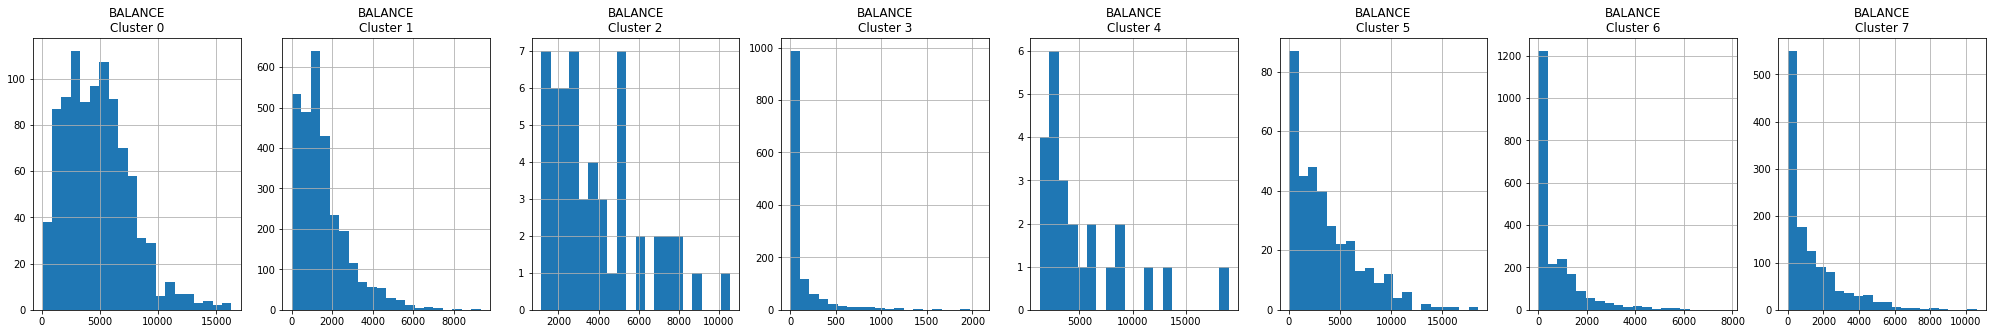

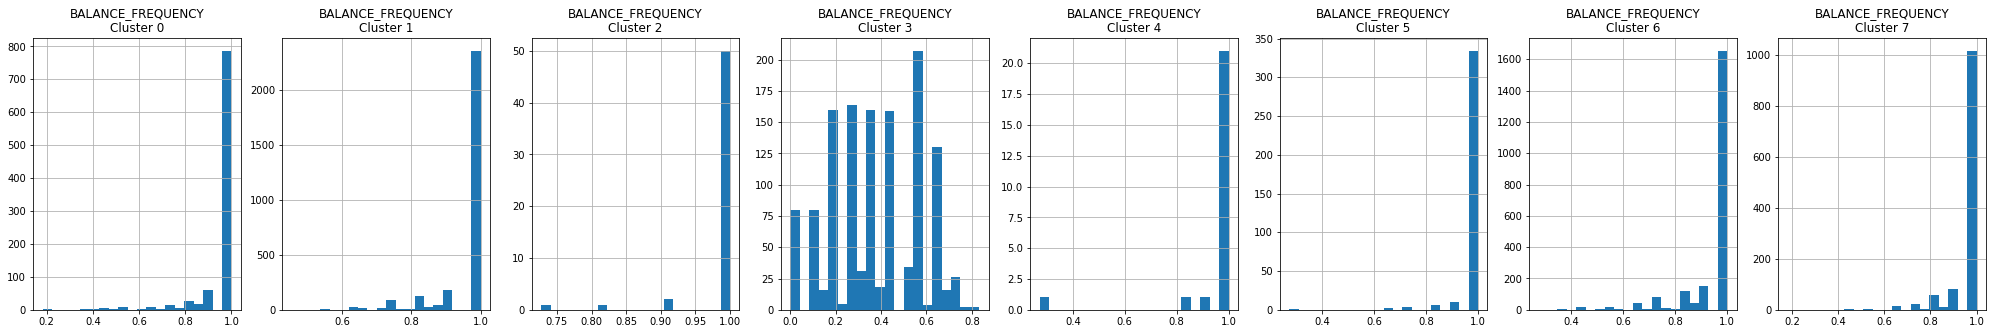

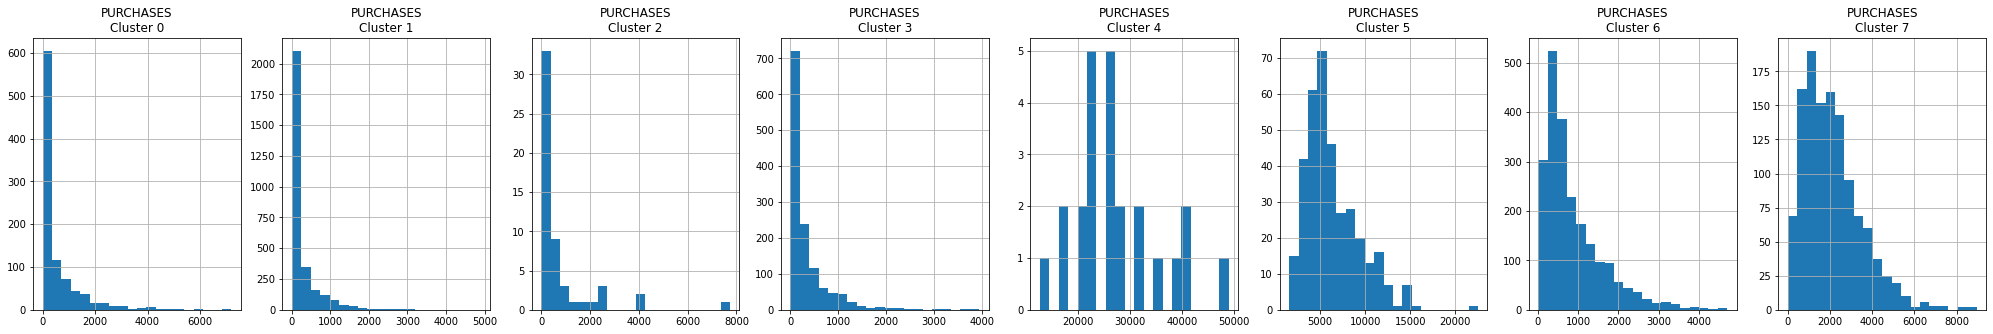

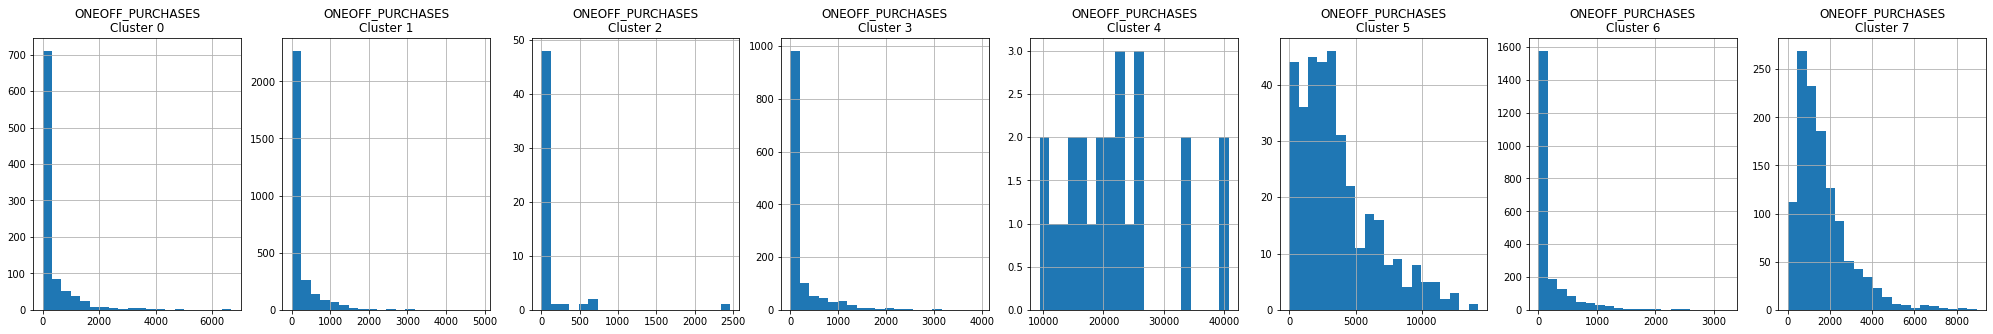

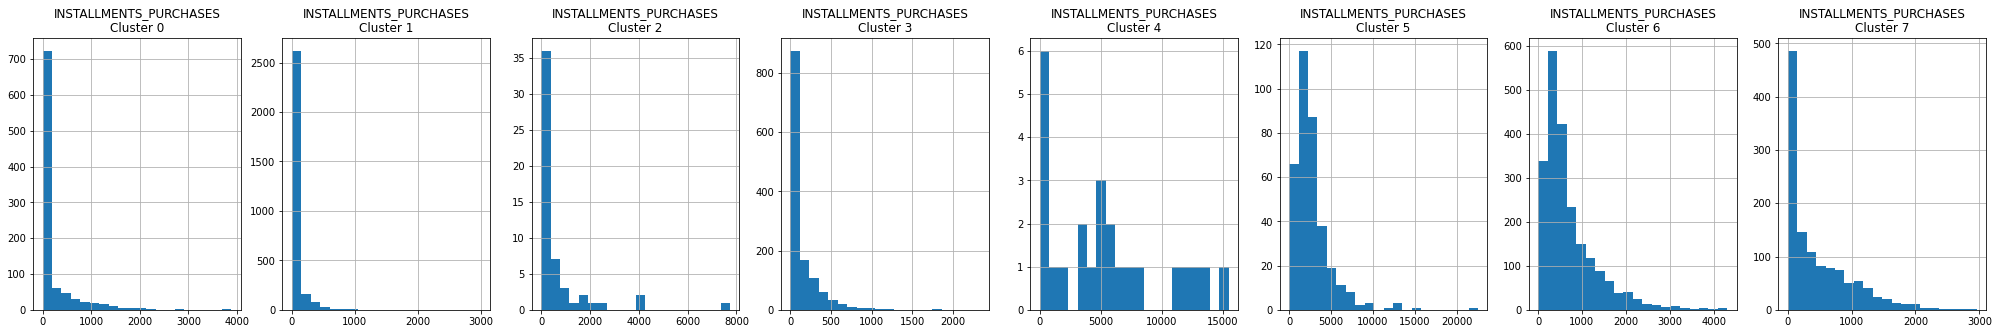

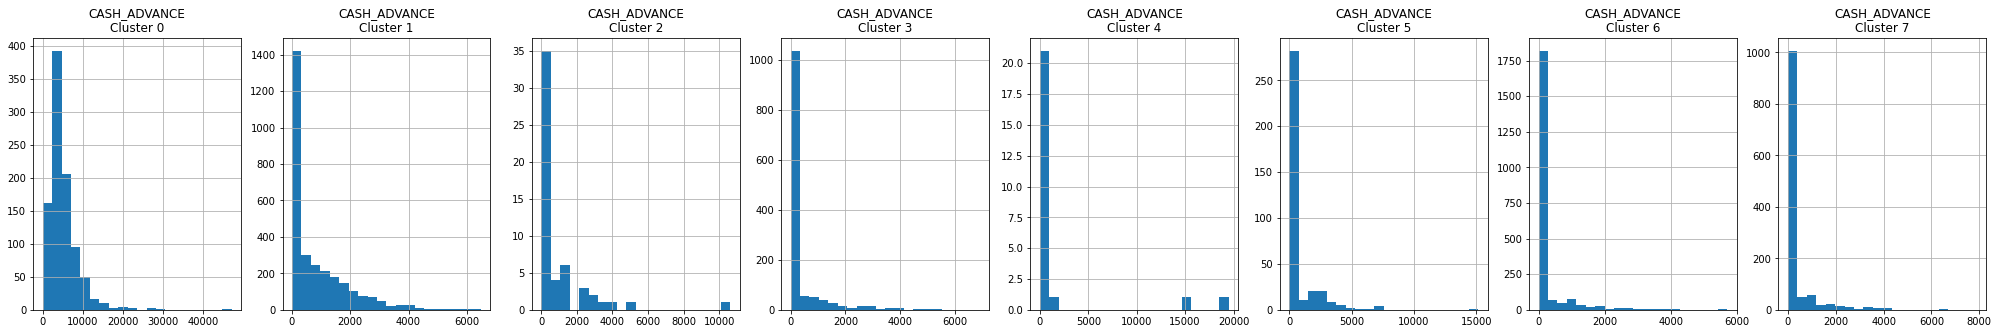

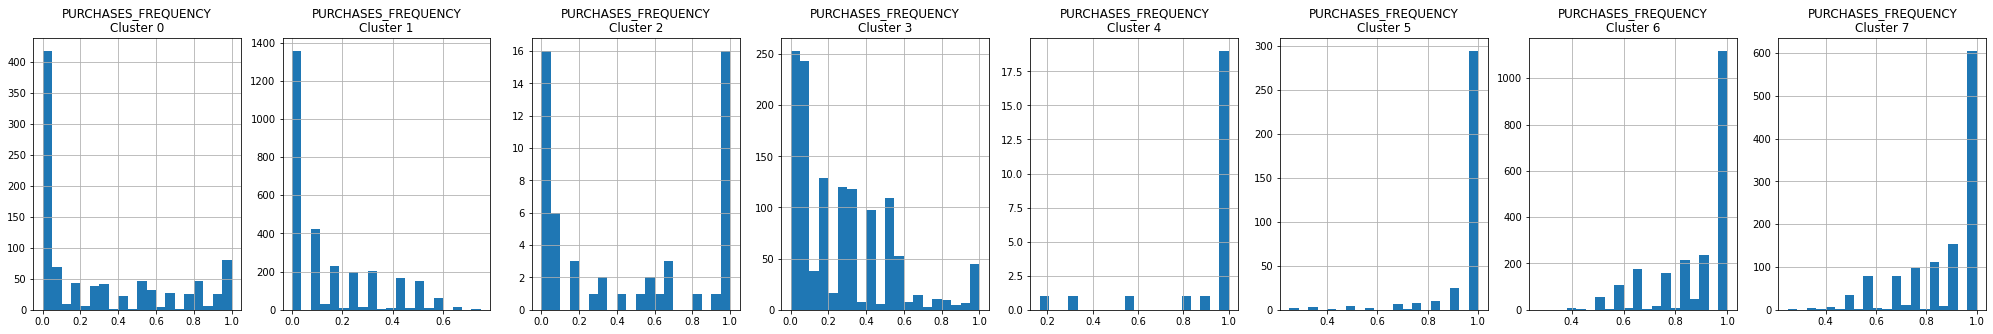

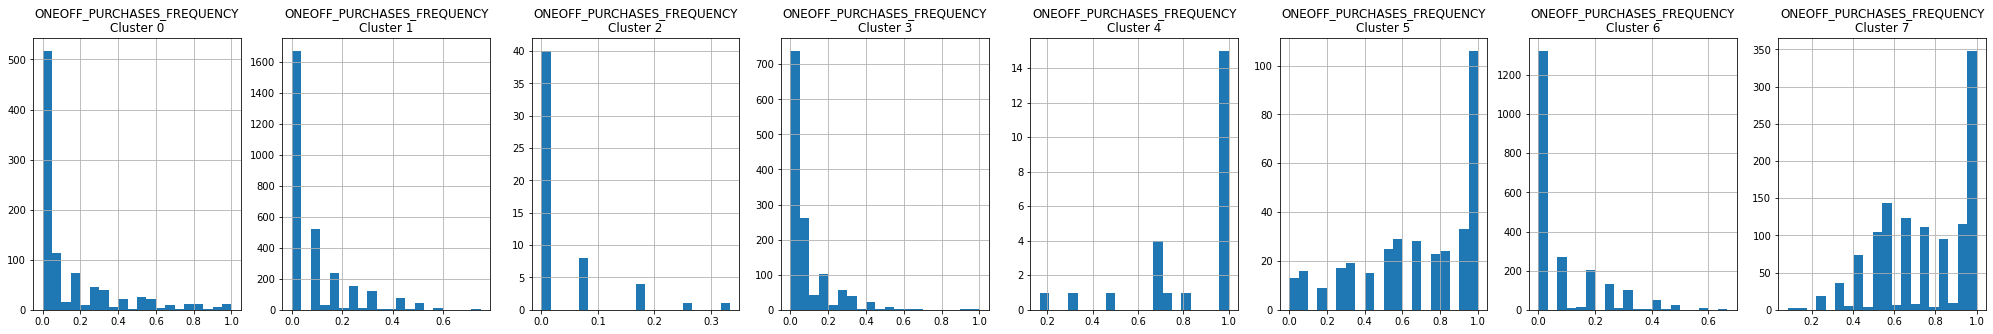

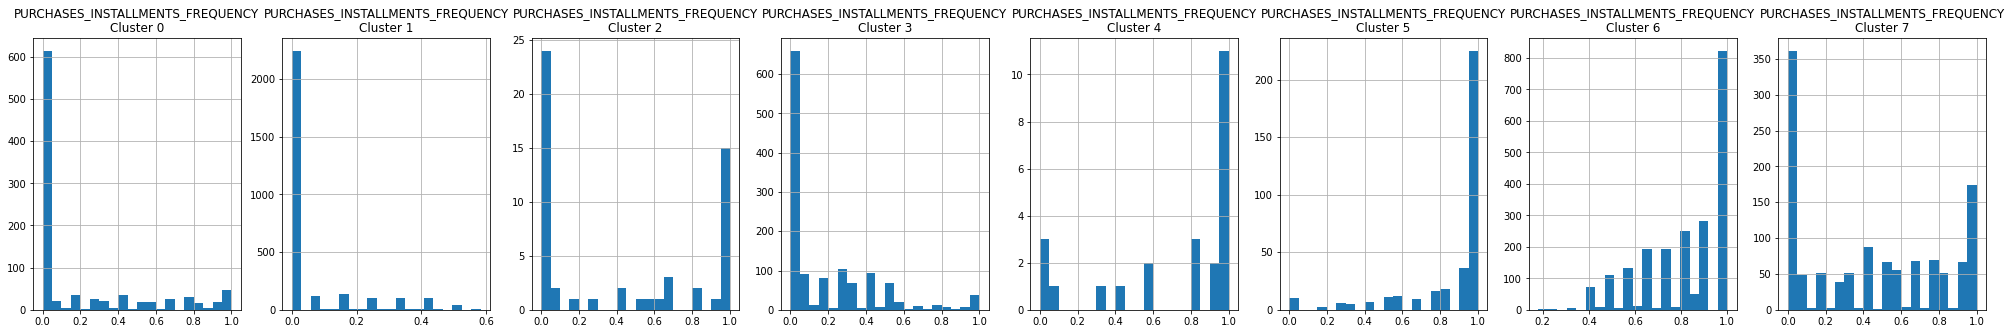

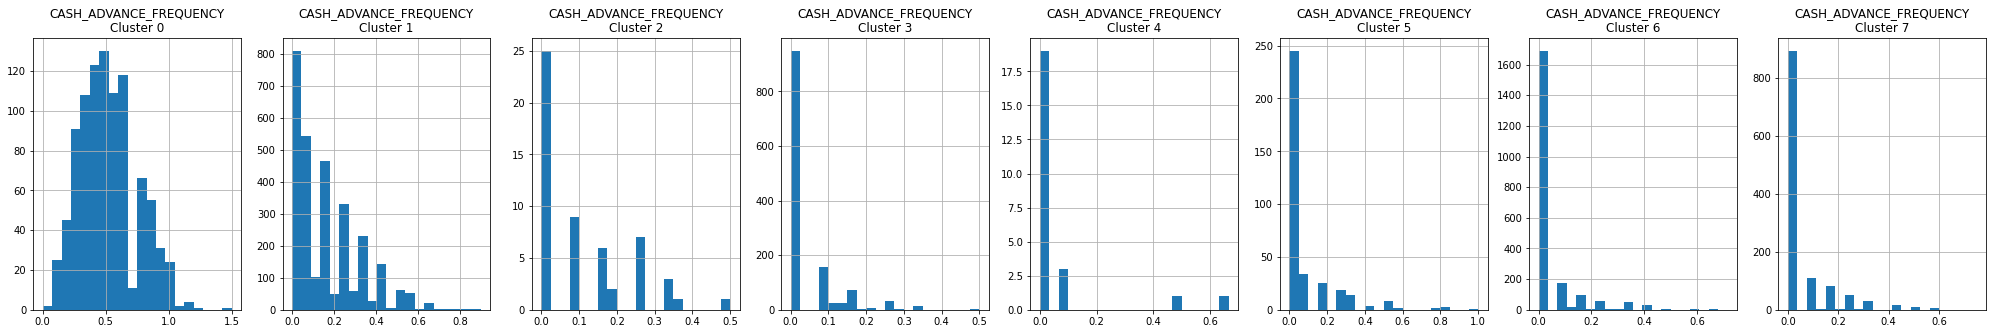

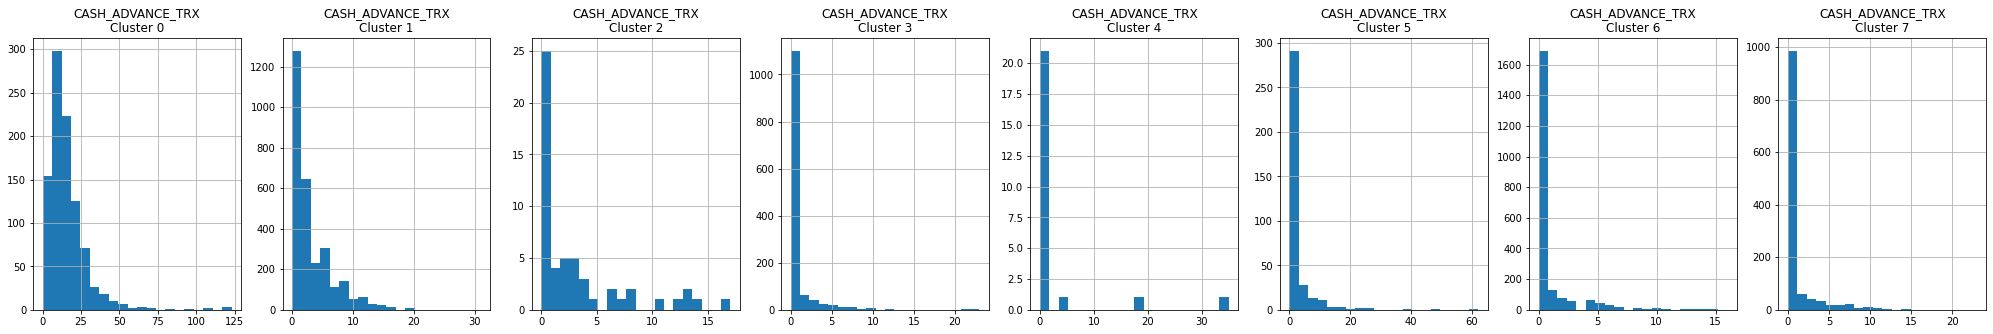

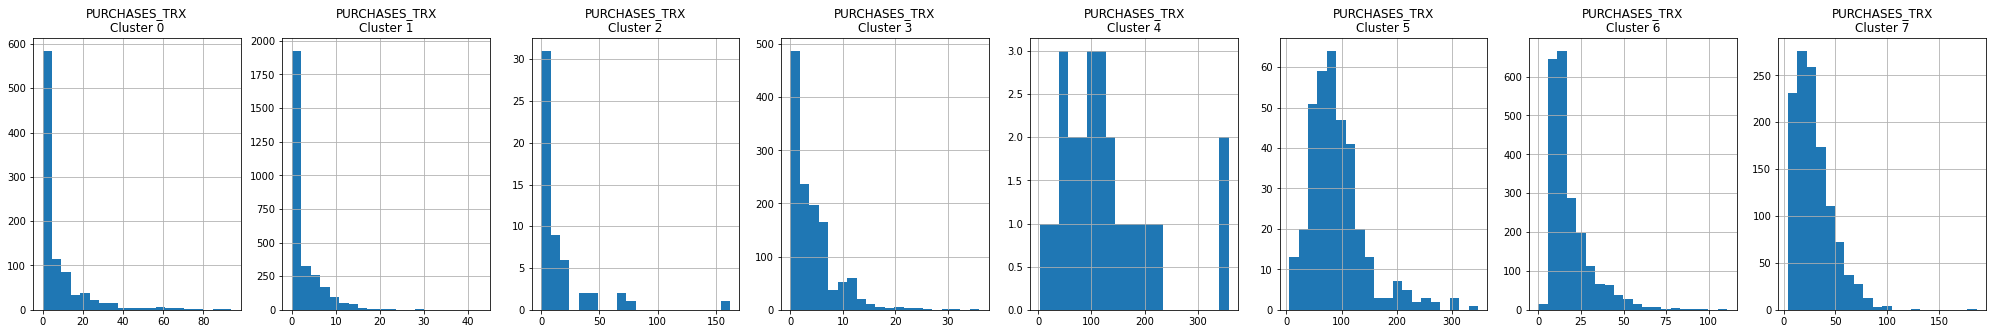

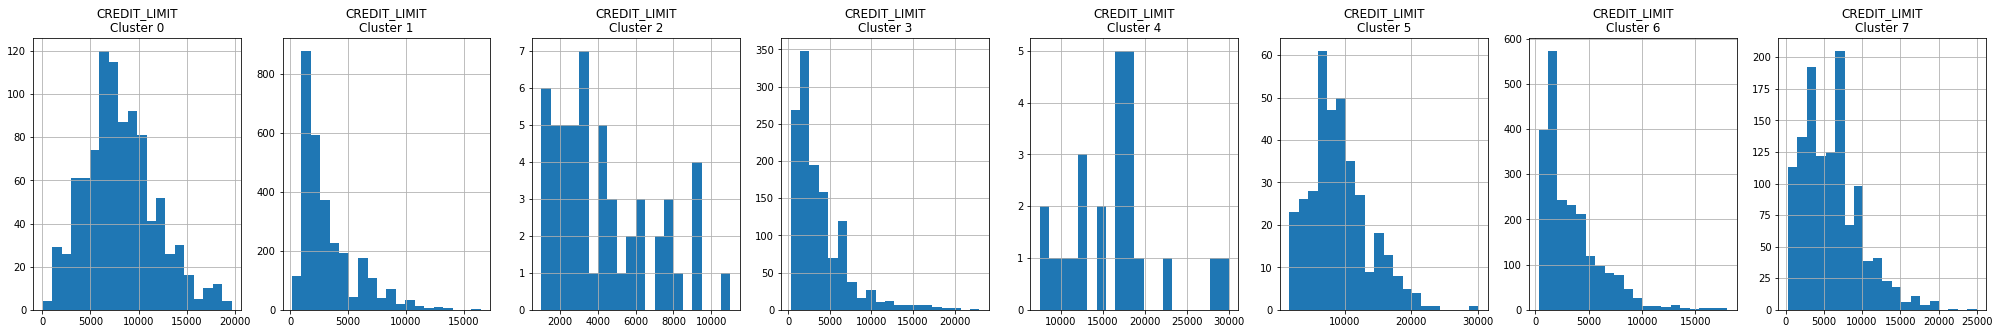

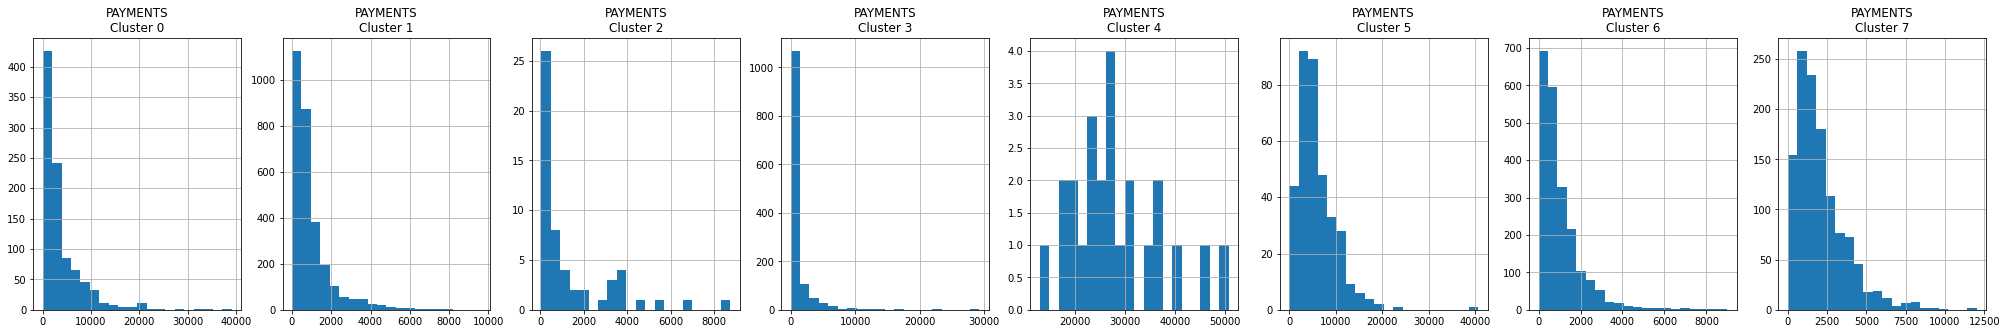

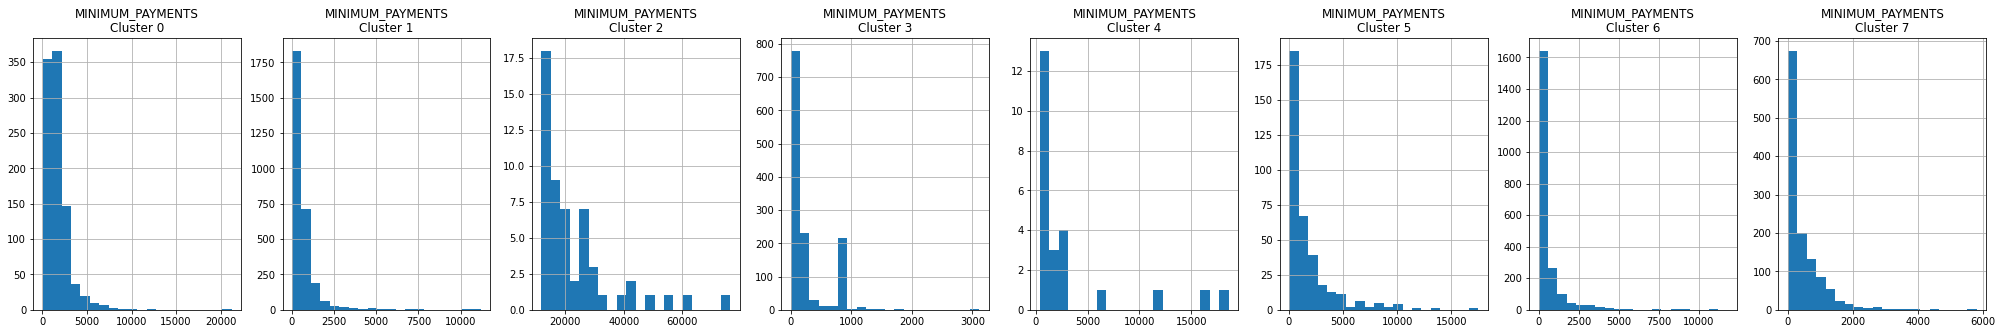

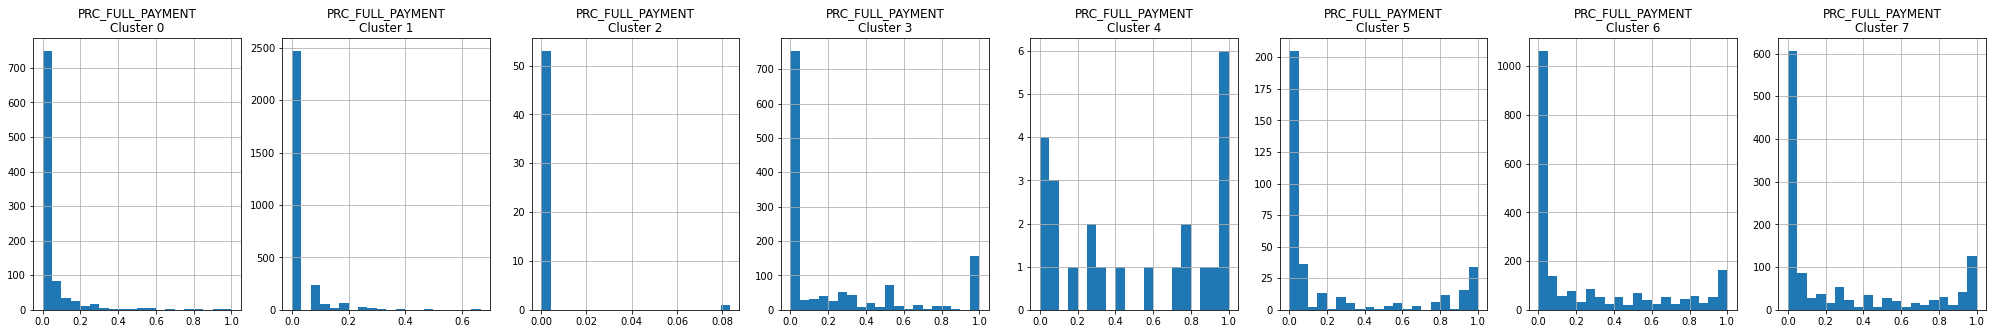

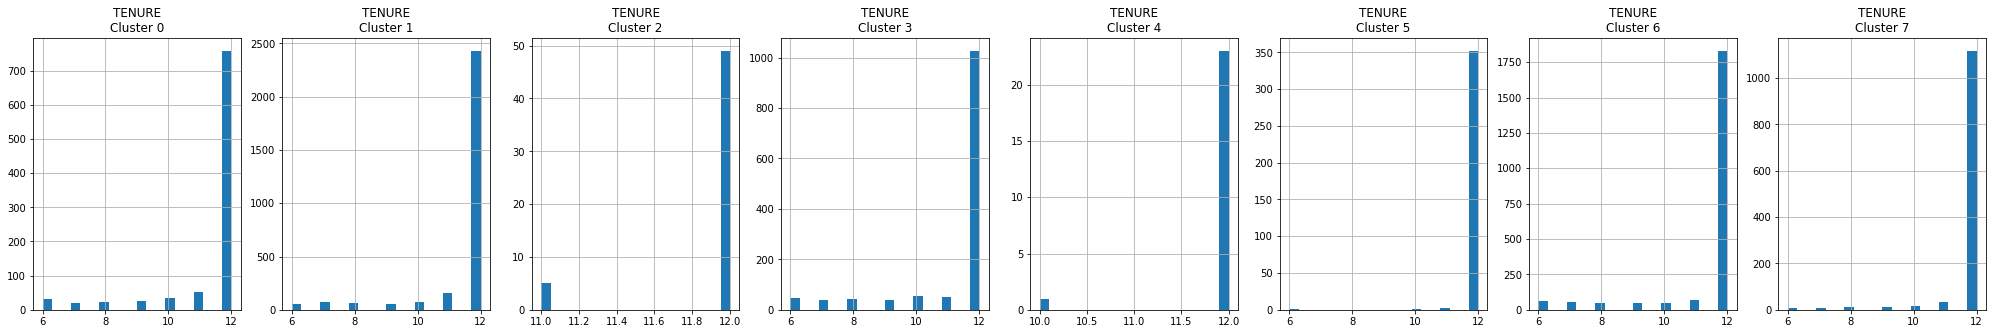

In [ ]:
# Plotting the Histograms

for i in creditcard_df.columns:
  plt.figure(figsize = (35,5))
  for j in range(8):
    plt.subplot(1,8, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['Cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title(f"{i}\nCluster {j}")


plt.show()

# **6. Dimensionality Reduction and Data Visualization**

*PCA - Principal Component Analysis:*

PCA is an **unsupervised** machine learning algorithm
It is used to **reduce the dimensions** while retaining original informations.
Works by trying to find a new set of features called components by composting the uncorelated input features.


## **6.1 Applying PCA**

Applying PCA on the scaled dataset and reducing it down to just 2 features, for visualising the clusters.

In [ ]:
# Applying PCA by compressing them only to 2 features

pca = PCA(n_components=2)
principal_component = pca.fit_transform(creditcard_df_scaled)


In [ ]:
pca_df = pd.DataFrame(data=principal_component, columns = ['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076454
1,-1.138295,2.506466
2,0.969682,-0.383535
3,-0.873627,0.043158
4,-1.599434,-0.688582
...,...,...
8945,-0.359629,-2.016144
8946,-0.564368,-1.639122
8947,-0.926203,-1.810785
8948,-2.336551,-0.657957


In [ ]:
# Concatenating the Labels to the Components

pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':labels})],axis=1)
pca_df

,PCA1,PCA2,Cluster
0,-1.682220,-1.076454,1
1,-1.138295,2.506466,0
2,0.969682,-0.383535,7
3,-0.873627,0.043158,1
4,-1.599434,-0.688582,1
...,...,...,...
8945,-0.359629,-2.016144,6
8946,-0.564368,-1.639122,6
8947,-0.926203,-1.810785,6
8948,-2.336551,-0.657957,1


## **6.2 Plotting a Scater Plot**

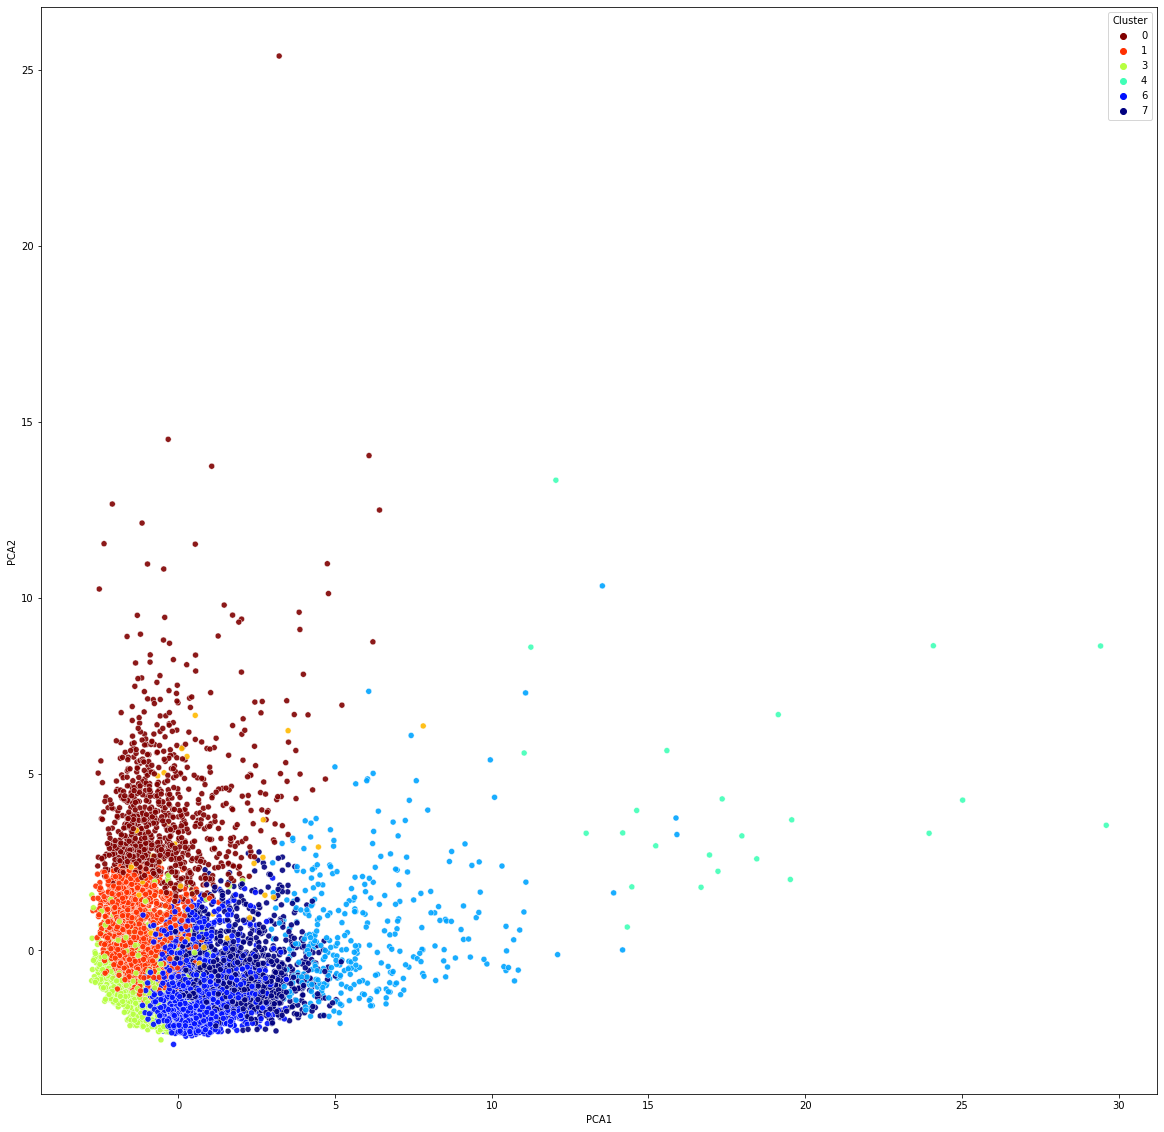

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x='PCA1',y='PCA2', hue='Cluster',data=pca_df,palette='jet_r',alpha=0.9,x_jitter=0.6)                 
plt.show()

# **7 Using Auto Encoders for Dimensionality Reduction**

In [ ]:
# importing the libraries

import tensorflow.keras.layers as lyr
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [ ]:
# input for the Auto Encoder
input_df = lyr.Input(shape=(17,))

# Encoder Layers
model = lyr.Dense(7, activation='relu')(input_df)
model = lyr.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(model)
model = lyr.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(model)
model = lyr.Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(model)

# Encoded Layer
encoded = lyr.Dense(10, activation='relu', kernel_initializer='glorot_uniform')(model)

# Decoder Layers
model = lyr.Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
model = lyr.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(model)

# Decoded Layer
decoded = lyr.Dense(17, kernel_initializer='glorot_uniform')(model)

# AutoEncoder Model
autoencoder = Model(input_df, decoded)

# Encoder Model
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# fitting the auto encoder
# Note : creditcard_df_scaled is passes twice, as both input and output.

autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled,
                batch_size=128, epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 54ms/step - loss: 0.5316
Epoch 2/25
70/70 [==============================] - 4s 54ms/step - loss: 0.2919
Epoch 3/25
70/70 [==============================] - 4s 54ms/step - loss: 0.2337
Epoch 4/25
70/70 [==============================] - 4s 54ms/step - loss: 0.2037
Epoch 5/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1727
Epoch 6/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1501
Epoch 7/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1236
Epoch 8/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1128
Epoch 9/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1038
Epoch 10/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1005
Epoch 11/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0915
Epoch 12/25
70/70 [==============================] - 4s 54ms/step - loss: 0.0922
Epoch 13/25
70/70 [==================

## **7.1 Model Summary**

*From the Model Summary We can see that:*


The model takes the Inputs of the Dataset, **17 features as input**, passes it on to the neural network.


```
input_df = lyr.Input(shape=(17,))

# Encoder Layers
model = lyr.Dense(7, activation='relu')(input_df)
model = lyr.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(model)
model = lyr.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(model)
model = lyr.Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(model)
```



*   layer **'dense_6'** is the **bottleneck**, this is where we would be getting our dimensinality reduction using the **encoded** layer.



```
encoded = lyr.Dense(10, activation='relu', kernel_initializer='glorot_uniform')(model)
```



*   from the 'bottleneck' , we pass the values to the rest of the neural network acting as a **decoder** that expands further and returns the **dense_9** as output which has a shape of **(none,17)**.



```
model = lyr.Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
model = lyr.Dense(500, activation='relu', kernel_initializer='glorot_uniform')(model)

# Decoded Layer
decoded = lyr.Dense(17, kernel_initializer='glorot_uniform')(model)
```







In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_3 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              22000 

## **7.2  K-Means after Auto Encoding**

After passing the input features to just the auto encoder part, we will receive 10 features.

We have reduced the number of features from 17 to 10.

This can be achived by calling the predict method on the auto-encoder part.

the resulting dataframe can be passed through to determine the optimal number of clusters using the Elbow Method and run it through k-means again.


In [ ]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape

(8950, 10)

### **7.2.1 Elbow Curve**

From the Elbow Curve below, We can see that the **WCSS Scores doesnt significantly reduce** after the 4th clusters.
Therefore, **4** Clusters should be able to split our current dataset fairly.

Also, comparing the elbow curve from earlier, we can see how by using lesser features we have gotten an optimum number of clusters near **4** which was around **7-9** in the previous case.

In [ ]:
# declaring a variable for storing the WCSS in an array

wxss_scores_encoder = []

num_of_clusters = range(1,21)

for i in num_of_clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  wxss_scores_encoder.append(kmeans.inertia_)

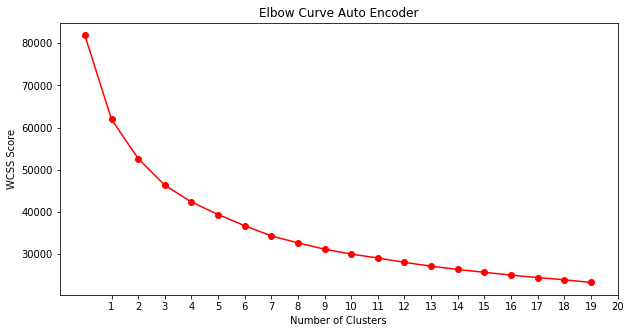

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(wxss_scores_encoder,'ro-')
plt.xticks(num_of_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Score")
plt.title("Elbow Curve Auto Encoder")
plt.show()

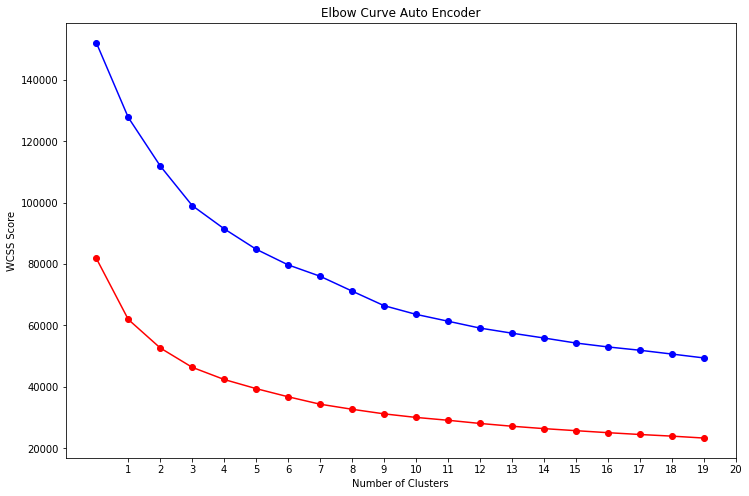

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(wxss_scores,'bo-')
plt.plot(wxss_scores_encoder,'ro-')
plt.xticks(num_of_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Score")
plt.title("Elbow Curve Auto Encoder")
plt.show()

### **7.2.2 Applying K-Means**

Applying K-Means with number of clusters as 4.

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [ ]:
# Concating creditcard dataframe with cluster labels data
creditcard_df_clust = pd.concat([creditcard_df,pd.DataFrame({'Cluster':labels})], axis=1)
creditcard_df_clust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
pca = PCA(2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=prin_comp, columns = ['PCA1','PCA2'] )

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis = 1)

In [ ]:
pca_df

,PCA1,PCA2,Cluster
0,-1.441739,0.105183,2
1,-1.148592,1.155618,2
2,0.505448,0.402324,0
3,-0.262373,0.386494,2
4,-1.736947,0.051532,2
...,...,...,...
8945,0.236199,-1.798061,1
8946,0.541519,-1.092936,1
8947,0.190708,-1.445670,1
8948,-0.192631,-0.593008,1


## **7.3 Plotting the Scatter Plot**

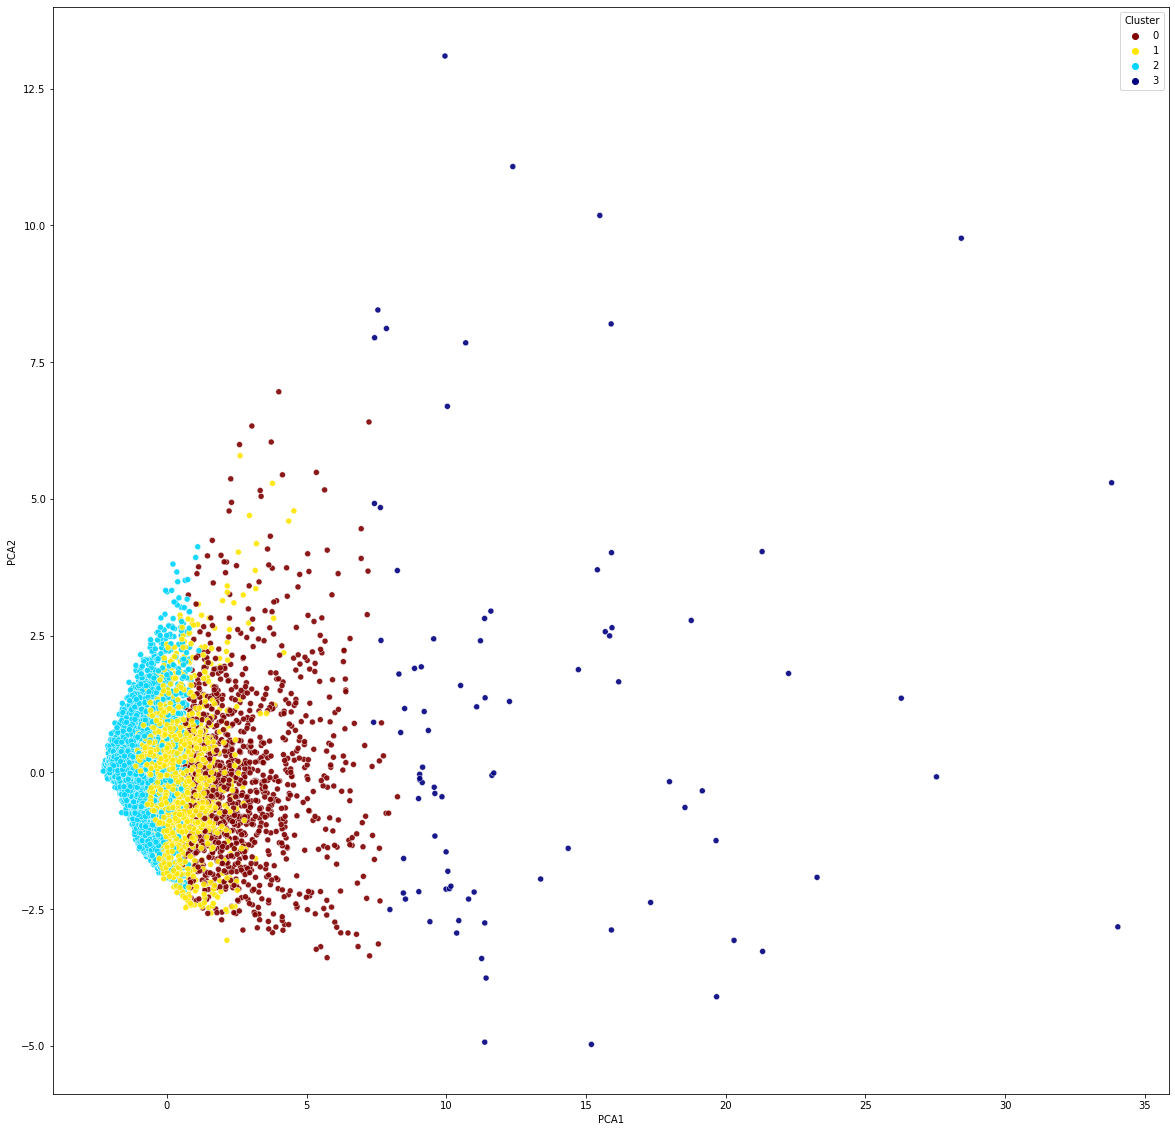

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x='PCA1',y='PCA2', hue='Cluster',data=pca_df,palette='jet_r',alpha=0.9,x_jitter=0.6)                 
plt.show()